In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler

In [33]:
house=pd.read_csv('/content/House_Pricing (1).csv')
house.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [34]:
house.shape

(21613, 21)

In [35]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [36]:
house.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [37]:
house.isna().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

In [38]:
house['Lot Area after Renovation (in Sqft)'].unique()


array([5650, 7639, 8062, ..., 5731, 1509, 2007])

In [39]:
house.drop(columns=['ID','No of Times Visited','Date House was Sold'],inplace=True)
house.isna().sum()

Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [40]:
house.columns

Index(['Sale Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'Waterfront View', 'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

In [41]:
#house.hist()

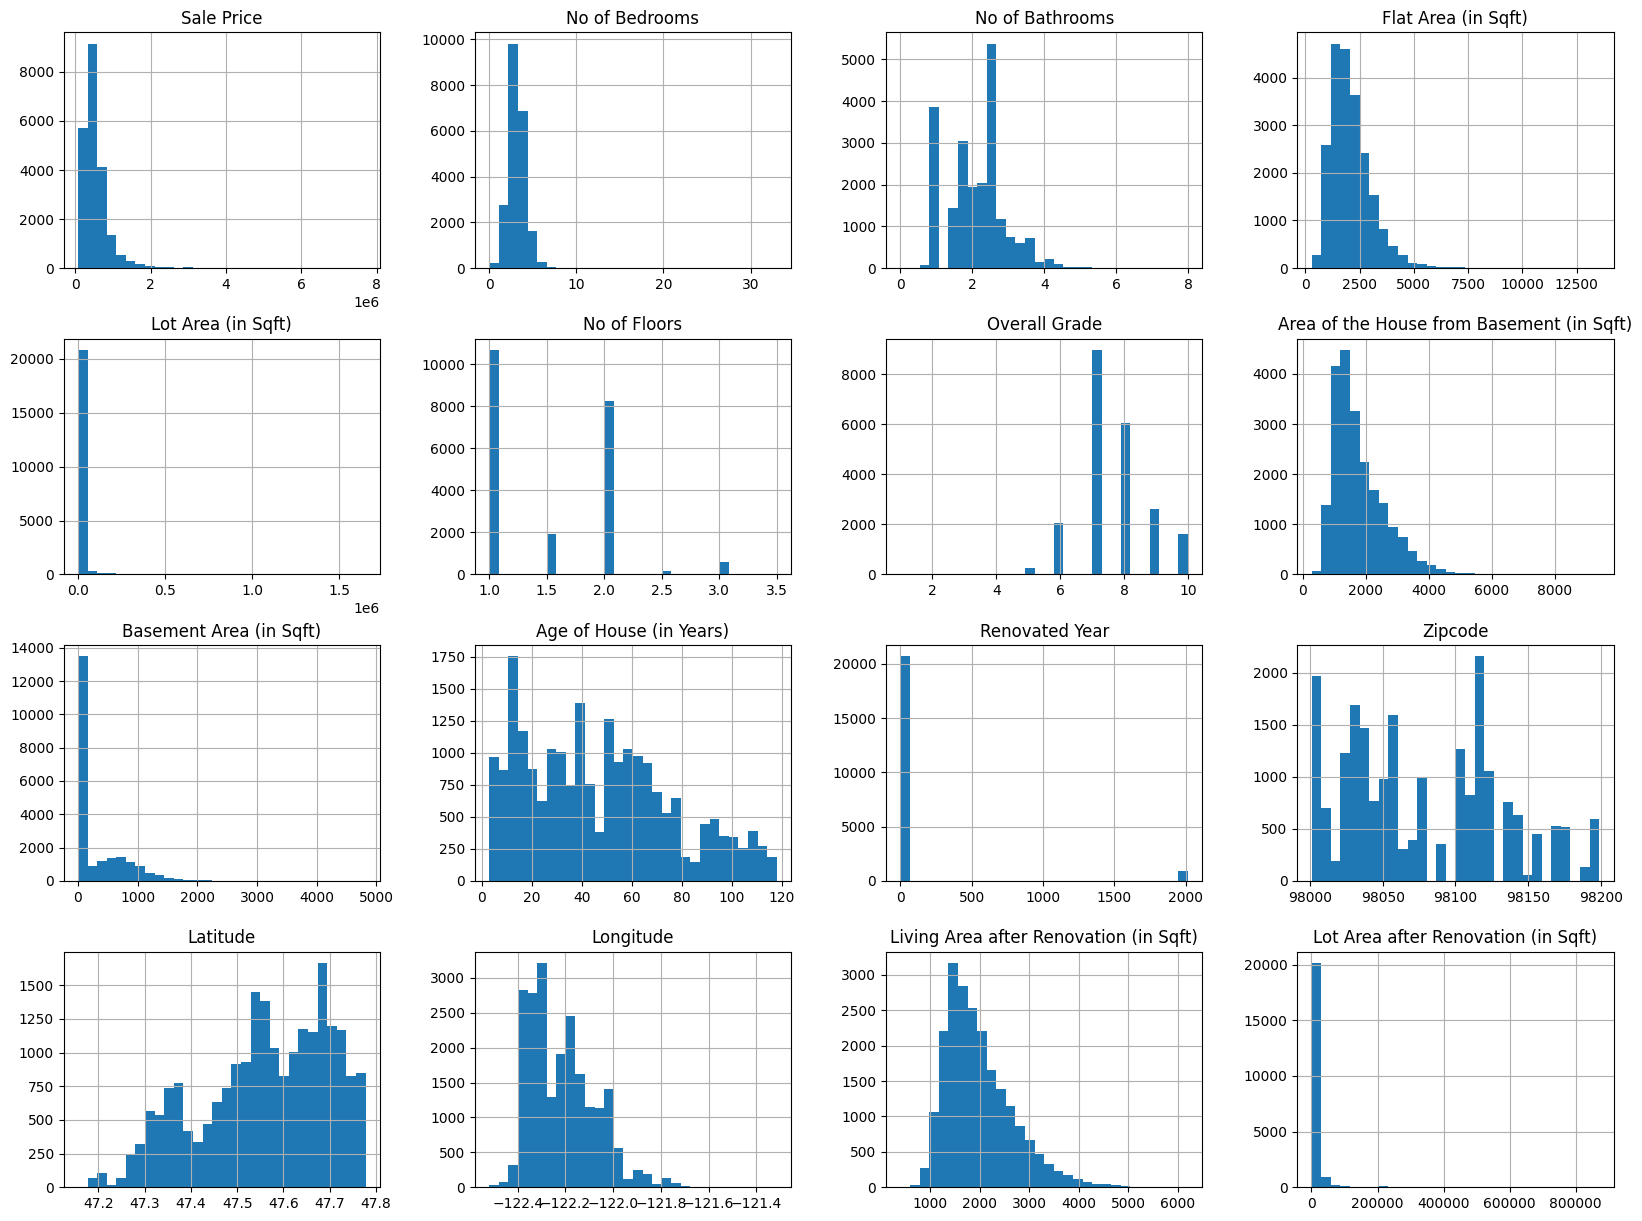

In [42]:
house.hist(bins=30, figsize=(20, 15))
plt.show()

In [43]:
medianvalues={'Sale Price':house['Sale Price'].median(),
              'No of Bathrooms':house['No of Bathrooms'].median(),
              'Flat Area (in Sqft)':house['Flat Area (in Sqft)'].median(),
              'Lot Area (in Sqft)':house['Lot Area (in Sqft)'].median(),
              'Area of the House from Basement (in Sqft)':house['Area of the House from Basement (in Sqft)'].median(),
              'Zipcode':house['Zipcode'].median(),
              'Latitude':house['Latitude'].median(),
              'Longitude':house['Longitude'].median(),
              'Living Area after Renovation (in Sqft)':house['Living Area after Renovation (in Sqft)'].median()}



In [44]:
house.fillna(value=medianvalues,inplace=True)
house.isna().sum()


Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(1, 0, 'Sale Price'),
  Text(2, 0, 'No of Bedrooms'),
  Text(3, 0, 'No of Bathrooms'),
  Text(4, 0, 'Flat Area (in Sqft)'),
  Text(5, 0, 'Lot Area (in Sqft)'),
  Text(6, 0, 'No of Floors'),
  Text(7, 0, 'Overall Grade'),
  Text(8, 0, 'Area of the House from Basement (in Sqft)'),
  Text(9, 0, 'Basement Area (in Sqft)'),
  Text(10, 0, 'Age of House (in Years)'),
  Text(11, 0, 'Renovated Year'),
  Text(12, 0, 'Zipcode'),
  Text(13, 0, 'Latitude'),
  Text(14, 0, 'Longitude'),
  Text(15, 0, 'Living Area after Renovation (in Sqft)'),
  Text(16, 0, 'Lot Area after Renovation (in Sqft)')])

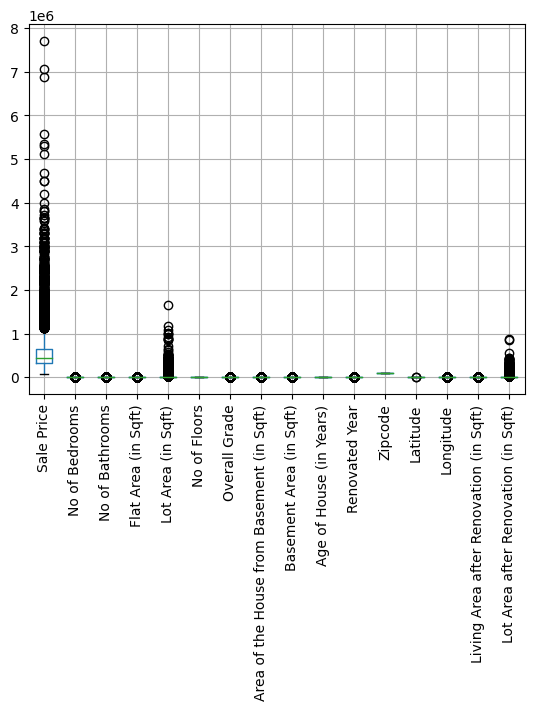

In [45]:
house.boxplot()
plt.xticks(rotation=90)



In [46]:
q1=np.percentile(house['Sale Price'],25,interpolation="midpoint")
q2=np.percentile(house['Sale Price'],50,interpolation="midpoint")
q3=np.percentile(house['Sale Price'],75,interpolation="midpoint")
IQR=q3-q1
min_value=q1-1.5*IQR
max_value=q3+1.5*IQR
print(min_value,max_value)
outliers=[]
for i in house['Sale Price']:
  if((i>max_value)) or ((i<min_value)):
    outliers.append(i)
outliers

-162500.0 1129500.0


[1230000.0,
 2000000.0,
 1350000.0,
 1330000.0,
 1450000.0,
 2250000.0,
 1510000.0,
 2400000.0,
 2900000.0,
 1370000.0,
 2050000.0,
 3080000.0,
 2380000.0,
 1380000.0,
 1400000.0,
 1350000.0,
 1550000.0,
 1300000.0,
 1450000.0,
 1200000.0,
 1150000.0,
 1390000.0,
 1280000.0,
 1200000.0,
 1490000.0,
 2250000.0,
 1600000.0,
 2130000.0,
 1450000.0,
 1950000.0,
 1220000.0,
 3070000.0,
 1250000.0,
 1150000.0,
 1480000.0,
 1580000.0,
 1300000.0,
 1310000.0,
 2250000.0,
 1360000.0,
 1220000.0,
 2400000.0,
 1270000.0,
 1200000.0,
 1320000.0,
 2450000.0,
 1240000.0,
 1570000.0,
 1130000.0,
 1200000.0,
 1280000.0,
 1960000.0,
 1750000.0,
 5110000.0,
 1150000.0,
 1880000.0,
 1230000.0,
 2300000.0,
 2260000.0,
 5300000.0,
 1200000.0,
 2200000.0,
 1130000.0,
 1180000.0,
 1700000.0,
 1400000.0,
 2540000.0,
 1360000.0,
 1230000.0,
 5350000.0,
 1330000.0,
 1220000.0,
 1250000.0,
 1300000.0,
 1180000.0,
 1380000.0,
 1150000.0,
 1200000.0,
 2250000.0,
 1230000.0,
 1270000.0,
 1680000.0,
 1930000.0,
 118

In [47]:
q1=np.percentile(house['Lot Area (in Sqft)'],25,interpolation="midpoint")
q2=np.percentile(house['Lot Area (in Sqft)'],50,interpolation="midpoint")
q3=np.percentile(house['Lot Area (in Sqft)'],75,interpolation="midpoint")
IQR=q3-q1
min_value=q1-1.5*IQR
max_value=q3+1.5*IQR
print(min_value,max_value)
outliers=[]
for i in house['Lot Area (in Sqft)']:
  if((i>max_value)) or ((i<min_value)):
    outliers.append(i)
outliers

-3427.5 19152.5


[101930.0,
 19901.0,
 44867.0,
 34848.0,
 24186.0,
 65005.0,
 21235.0,
 20158.0,
 50094.0,
 50529.0,
 35102.0,
 39683.0,
 41800.0,
 36847.0,
 107593.0,
 33919.0,
 28037.0,
 111078.0,
 315374.0,
 60984.0,
 19850.0,
 25245.0,
 38332.0,
 21000.0,
 35003.0,
 66211.0,
 155073.0,
 33474.0,
 19436.0,
 28040.0,
 94300.0,
 221284.0,
 36224.0,
 40510.0,
 20100.0,
 57346.0,
 26300.0,
 49375.0,
 22111.0,
 78408.0,
 64904.0,
 45004.0,
 43995.0,
 20000.0,
 32633.0,
 19800.0,
 77972.0,
 29970.0,
 40438.0,
 69415.0,
 209959.0,
 26977.0,
 25600.0,
 22357.0,
 40139.0,
 143947.0,
 32239.0,
 37461.0,
 174240.0,
 171626.0,
 27260.0,
 19700.0,
 219978.0,
 24920.0,
 20978.0,
 28025.0,
 181319.0,
 19635.0,
 57063.0,
 39150.0,
 194278.0,
 230652.0,
 36947.0,
 76230.0,
 24069.0,
 40518.0,
 29242.0,
 29170.0,
 108900.0,
 217014.0,
 22370.0,
 75794.0,
 84942.0,
 217800.0,
 32666.0,
 31465.0,
 34293.0,
 26326.0,
 36400.0,
 55867.0,
 22267.0,
 209523.0,
 19252.0,
 23488.0,
 25958.0,
 26055.0,
 39478.0,
 51836.0,
 3

In [48]:
q1=np.percentile(house['Lot Area after Renovation (in Sqft)'],25,interpolation="midpoint")
q2=np.percentile(house['Lot Area after Renovation (in Sqft)'],50,interpolation="midpoint")
q3=np.percentile(house['Lot Area after Renovation (in Sqft)'],75,interpolation="midpoint")
IQR=q3-q1
min_value=q1-1.5*IQR
max_value=q3+1.5*IQR
print(min_value,max_value)
outliers=[]
for i in house['Lot Area after Renovation (in Sqft)']:
  if((i>max_value)) or ((i<min_value)):
    outliers.append(i)
outliers

-2374.5 17557.5


[101930,
 20336,
 30617,
 72513,
 18900,
 20158,
 38917,
 50529,
 35020,
 39750,
 135036,
 35065,
 47777,
 35001,
 88500,
 19265,
 87991,
 193842,
 18000,
 36590,
 35230,
 67268,
 50965,
 18386,
 20953,
 35096,
 80100,
 148539,
 18841,
 36224,
 33450,
 20060,
 47443,
 49385,
 19508,
 78408,
 57500,
 17958,
 35781,
 78408,
 20000,
 32156,
 19207,
 22654,
 17689,
 28399,
 44049,
 21455,
 24361,
 19868,
 19009,
 27743,
 22357,
 36852,
 143947,
 36497,
 18295,
 174240,
 211267,
 39480,
 21887,
 210394,
 75396,
 181319,
 50529,
 178160,
 233971,
 28837,
 49206,
 104374,
 24728,
 29170,
 20697,
 65340,
 107898,
 25346,
 98010,
 199504,
 165963,
 43560,
 32186,
 19400,
 35982,
 38255,
 26324,
 18000,
 213444,
 34589,
 21567,
 38312,
 41075,
 37034,
 23900,
 54885,
 33341,
 218222,
 34500,
 23680,
 63162,
 25792,
 33171,
 36149,
 36906,
 101529,
 18306,
 18503,
 28826,
 47916,
 27600,
 33900,
 213444,
 32417,
 32130,
 37891,
 19811,
 35160,
 75358,
 33447,
 21803,
 217800,
 44431,
 21810,
 443

In [49]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21613 non-null  float64
 1   No of Bedrooms                             21613 non-null  int64  
 2   No of Bathrooms                            21613 non-null  float64
 3   Flat Area (in Sqft)                        21613 non-null  float64
 4   Lot Area (in Sqft)                         21613 non-null  float64
 5   No of Floors                               21613 non-null  float64
 6   Waterfront View                            21613 non-null  object 
 7   Condition of the House                     21613 non-null  object 
 8   Overall Grade                              21613 non-null  int64  
 9   Area of the House from Basement (in Sqft)  21613 non-null  float64
 10  Basement Area (in Sqft

In [50]:
house.columns

Index(['Sale Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'Waterfront View', 'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

In [51]:
categorical_cols=['Waterfront View', 'Condition of the House']
numerical_cols=['Sale Price', 'No of Bedrooms', 'No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)', 'No of Floors',
                'Overall Grade','Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)','Age of House (in Years)',
                'Renovated Year', 'Zipcode', 'Latitude','Longitude', 'Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)']

In [52]:
house_encoded=pd.get_dummies(house,columns=categorical_cols,dtype= int,drop_first=True)
house_encoded.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,...,98178.0,47.5112,-122.257,1340.0,5650,0,0,1,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,...,98125.0,47.7210,-122.319,1690.0,7639,0,0,1,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,...,98028.0,47.7379,-122.233,2720.0,8062,0,0,1,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,910,53,...,98136.0,47.5208,-122.393,1360.0,5000,0,1,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,0,31,...,98074.0,47.6168,-122.045,1800.0,7503,0,0,1,0,0


In [53]:
house_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21613 non-null  float64
 1   No of Bedrooms                             21613 non-null  int64  
 2   No of Bathrooms                            21613 non-null  float64
 3   Flat Area (in Sqft)                        21613 non-null  float64
 4   Lot Area (in Sqft)                         21613 non-null  float64
 5   No of Floors                               21613 non-null  float64
 6   Overall Grade                              21613 non-null  int64  
 7   Area of the House from Basement (in Sqft)  21613 non-null  float64
 8   Basement Area (in Sqft)                    21613 non-null  int64  
 9   Age of House (in Years)                    21613 non-null  int64  
 10  Renovated Year        

In [54]:
house_encoded.shape

(21613, 21)

In [55]:
house_std_scaled=house_encoded.copy()
std_scaler=StandardScaler()
house_std_scaled[numerical_cols]=std_scaler.fit_transform(house_std_scaled[numerical_cols])
house_std_scaled.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,-0.866430,-0.398737,-1.447640,-0.979940,-0.228268,-0.915427,-0.564013,-0.734756,-0.658681,0.544898,...,1.870228,-0.352545,-0.306112,-0.943328,-0.260715,0,0,1,0,0
1,-0.005939,-0.398737,0.175628,0.533757,-0.189832,0.936506,-0.564013,0.461025,0.245141,0.681079,...,0.879629,1.161615,-0.746380,-0.432658,-0.187868,0,0,1,0,0
2,-0.980490,-1.473959,-1.447640,-1.426426,-0.123244,-0.915427,-1.468651,-1.229979,-0.658681,1.293892,...,-0.933352,1.283585,-0.135686,1.070173,-0.172375,0,0,1,0,0
3,0.173727,0.676485,1.149589,-0.130528,-0.243962,-0.915427,-0.564013,-0.891778,1.397515,0.204446,...,1.085225,-0.283260,-1.271861,-0.914147,-0.284522,0,1,0,0,0
4,-0.082161,-0.398737,-0.149026,-0.435445,-0.169600,-0.915427,0.340626,-0.130826,-0.658681,-0.544548,...,-0.073588,0.409587,1.199321,-0.272161,-0.192849,0,0,1,0,0


In [56]:
house_std_scaled.describe()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
count,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,21613.000000,...,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.471097e-17,2.367051e-16,-1.578034e-16,1.683236e-16,-1.052023e-17,-3.156068e-17,2.367051e-16,1.315028e-16,6.838148e-17,0.000000,...,1.975797e-14,1.006654e-15,1.009113e-13,-1.367630e-16,-2.893063e-17,0.007542,0.078703,0.649193,0.262759,0.007958
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023,...,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,0.086517,0.269280,0.477234,0.440143,0.088855
min,-1.266323e+00,-3.624404e+00,-2.746255e+00,-1.949142e+00,-3.521247e-01,-9.154270e-01,-5.991845e+00,-1.809752e+00,-6.586810e-01,-1.497813,...,-1.437997e+00,-2.916802e+00,-2.166599e+00,-2.316303e+00,-4.438052e-01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.939366e-01,-3.987371e-01,-4.736791e-01,-7.076925e-01,-2.429959e-01,-9.154270e-01,-5.640127e-01,-7.226779e-01,-6.586810e-01,-0.885000,...,-8.398996e-01,-6.426748e-01,-8.102899e-01,-7.244697e-01,-2.808593e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.454937e-01,-3.987371e-01,1.756281e-01,-1.849770e-01,-1.807659e-01,1.053939e-02,-5.640127e-01,-2.757696e-01,-6.586810e-01,-0.136006,...,-2.418026e-01,8.481501e-02,-1.143824e-01,-2.137990e-01,-1.885636e-01,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.853373e-01,6.764851e-01,5.002817e-01,5.119769e-01,-1.067057e-01,9.365058e-01,3.406260e-01,5.093396e-01,6.066704e-01,0.681079,...,7.487957e-01,8.512775e-01,6.312328e-01,5.449116e-01,-9.835556e-02,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.949053e+01,3.185793e+01,7.642662e+00,1.247998e+01,3.950496e+01,3.714405e+00,2.149903e+00,9.205933e+00,1.023238e+01,2.417383,...,2.262729e+00,1.570107e+00,6.383121e+00,6.162289e+00,3.144029e+01,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
house_minmax_scaled=house_encoded.copy()
minmax_scaler=MinMaxScaler()
house_minmax_scaled[numerical_cols]=minmax_scaler.fit_transform(house_minmax_scaled[numerical_cols])
house_minmax_scaled.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.666667,0.097588,0.000000,0.521739,...,0.893939,0.571498,0.217608,0.161934,0.005742,0,0,1,0,0
1,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.666667,0.206140,0.082988,0.556522,...,0.626263,0.908959,0.166113,0.222165,0.008027,0,0,1,0,0
2,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.555556,0.052632,0.000000,0.713043,...,0.136364,0.936143,0.237542,0.399415,0.008513,0,0,1,0,0
3,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.666667,0.083333,0.188797,0.434783,...,0.681818,0.586939,0.104651,0.165376,0.004996,0,1,0,0,0
4,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.777778,0.152412,0.000000,0.243478,...,0.368687,0.741354,0.393688,0.241094,0.007871,0,0,1,0,0


In [63]:
corr_colunmns=['Sale Price', 'No of Bedrooms', 'No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)', 'No of Floors',
                'Overall Grade','Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)','Age of House (in Years)',
                'Renovated Year', 'Zipcode', 'Latitude','Longitude', 'Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)']
original_house_corr=house[corr_colunmns].corr()
original_house_corr

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
Sale Price,1.000000,0.308366,0.525041,0.702024,0.089568,0.256836,0.580644,0.605344,0.323781,-0.053988,0.126444,-0.053190,0.306850,0.021538,0.585377,0.082456
No of Bedrooms,0.308366,1.000000,0.515866,0.576566,0.031668,0.175429,0.349008,0.477583,0.303093,-0.154178,0.018841,-0.152651,-0.008885,0.129494,0.391651,0.029244
No of Bathrooms,0.525041,0.515866,1.000000,0.754565,0.087717,0.500575,0.635541,0.685099,0.283767,-0.505928,0.050745,-0.203965,0.024495,0.223125,0.568542,0.087213
Flat Area (in Sqft),0.702024,0.576566,0.754565,1.000000,0.172723,0.353875,0.705666,0.876211,0.435160,-0.318063,0.055380,-0.199397,0.052518,0.240111,0.756188,0.183228
Lot Area (in Sqft),0.089568,0.031668,0.087717,0.172723,1.000000,-0.005218,0.102316,0.183489,0.015264,-0.053069,0.007643,-0.129537,-0.085707,0.229466,0.144516,0.718531
No of Floors,0.256836,0.175429,0.500575,0.353875,-0.005218,1.000000,0.461228,0.523818,-0.245705,-0.489319,0.006338,-0.059122,0.049644,0.125394,0.279858,-0.011269
Overall Grade,0.580644,0.349008,0.635541,0.705666,0.102316,0.461228,1.000000,0.705072,0.145266,-0.456629,0.010440,-0.185839,0.111298,0.201746,0.681332,0.107581
Area of the House from Basement (in Sqft),0.605344,0.477583,0.685099,0.876211,0.183489,0.523818,0.705072,1.000000,-0.051836,-0.423792,0.023309,-0.261105,-0.000898,0.343775,0.731962,0.194106
Basement Area (in Sqft),0.323781,0.303093,0.283767,0.435160,0.015264,-0.245705,0.145266,-0.051836,1.000000,0.133124,0.071323,0.074856,0.110552,-0.144730,0.200375,0.017276
Age of House (in Years),-0.053988,-0.154178,-0.505928,-0.318063,-0.053069,-0.489319,-0.456629,-0.423792,0.133124,1.000000,0.224874,0.346760,0.148059,-0.409330,-0.326188,-0.070958


<Axes: >

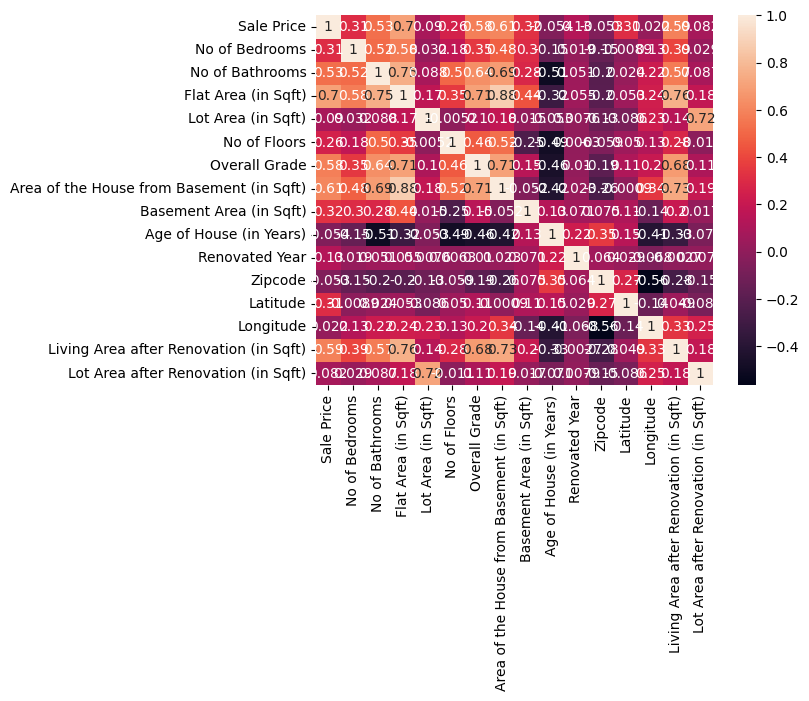

In [64]:
sns.heatmap(original_house_corr,annot=True)